## IMDB Sentiment Classification with TF‑IDF + Logistic Regression

In [ ]:
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the IMDB dataset from Hugging Face Datasets
imdb = load_dataset("imdb")

# Extract texts and labels from the training split
texts = list(imdb["train"]["text"])
label = list(imdb["train"]["label"])

# Split into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(texts,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True)

# Convert text into TF-IDF features
vectorizer = TfidfVectorizer(
    max_features=10000,      # limit vocabulary size
    stop_words="english",    # remove English stopwords
    ngram_range=(1, 2)       # include unigrams and bigrams
)

# Fit vectorizer on training data and transform both train/test sets
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train a Logistic Regression classifier
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

## Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_predict = clf.predict(X_test)

print(f"accuracy: {accuracy_score(y_test, y_predict):.3f}")
print(f"precision: {precision_score(y_test, y_predict):.3f}")
print(f"recall: {recall_score(y_test, y_predict):.3f}")
print(f"f1 score: {f1_score(y_test, y_predict):.3f}")

accuracy: 0.885
precision: 0.871
recall: 0.902
f1 score: 0.886


## Label Names in the IMDB Dataset

In [12]:
labels = imdb["train"].features["label"].names
labels

['neg', 'pos']

## Visualizing the Confusion Matrix

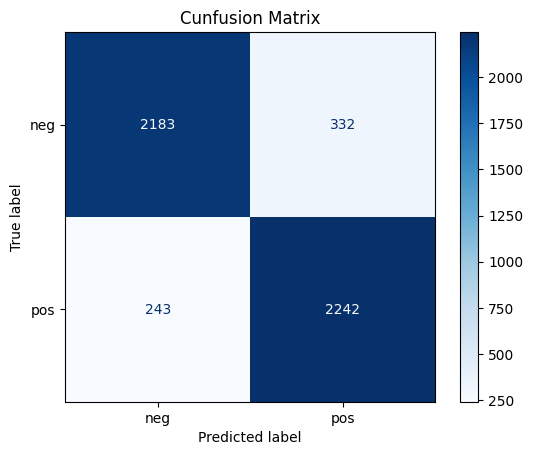

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=y_test, y_pred=y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)

disp.plot(cmap="Blues")
plt.title("Cunfusion Matrix");